**Análise dos clientes Inadimplentes**

Este projeto busca analisar quais variáveis impactam no volume de clientes inadimplentes, essas variáveis são:


*   Nível de escolaridade
*   Faixa de renda
*   Estado civil





**PACOTES UTILIZADOS**

In [3]:
#leitura de dados
import pandas as pd
#Visualização de dados 
import seaborn as sns
import matplotlib.pyplot as plt

**Carregamento de dados**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na') #Importando arquivo web

**Exploração dos dados**



In [5]:
df.head(n=10) # lendo as primeiras 10 linhas da base de dados.

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [6]:
df.shape #Qtd de linhas e colunas da base de dados

(10127, 16)

In [7]:
qtd_total=df.shape 
print(qtd_total) #retorna qtd linhas e colunas e colocando em uma variável

(10127, 16)


In [8]:
df[df['default']==0]. shape #Retorna qtd linhas e colunas onde a coluna default é igual a zero(adimplentes)

(8500, 16)

In [10]:
qtd_inadimplentes=df[df['default']==1]. shape  #Retorna qtd linhas e colunas onde a coluna default é igual a zero(inadimplentes)

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100* qtd_adimplentes[0]/qtd_total[0],2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100* qtd_inadimplentes[0]/qtd_total[0],2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [11]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

**Selecionado apenas dados categóricos**

In [12]:
df.select_dtypes('object') # selecionando apenas colunas com strings

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
0,M,ensino medio,casado,$60K - $80K,blue,"12.691,51","1.144,90"
1,F,mestrado,solteiro,menos que $40K,blue,"8.256,96","1.291,45"
2,M,mestrado,casado,$80K - $120K,blue,"3.418,56","1.887,72"
3,F,ensino medio,NaN,menos que $40K,blue,"3.313,03","1.171,56"
4,M,sem educacao formal,casado,$60K - $80K,blue,"4.716,22","816,08"
...,...,...,...,...,...,...,...
10122,M,mestrado,solteiro,$40K - $60K,blue,"4.003,91","15.476,26"
10123,M,NaN,divorciado,$40K - $60K,blue,"4.277,04","8.764,88"
10124,F,ensino medio,casado,menos que $40K,blue,"5.409,16","10.291,78"
10125,M,mestrado,NaN,$40K - $60K,blue,"5.281,84","8.395,62"


**OBS:** As colunas de limite de crédito e valor_transações_12m encontram-se como strings, devendo ser convertidas em formato numérico.

In [13]:
df.select_dtypes('object').describe() # O describe descreve alguns aspectos dos dados, a contagdm, max, min, unique, freq.

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
count,10127,8608,9378,9015,10127,10127,10127
unique,2,5,3,5,4,9272,10035
top,F,mestrado,casado,menos que $40K,blue,"1.438,21","3.851,51"
freq,5358,3128,4687,3561,9436,11,3


In [14]:
df.select_dtypes('object').describe().transpose() # transpose traz o describe para a coluna

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


**DADOS NUMÉRICOS**

In [15]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose() # exclui as coluna id e seleciona apenas os dados com  o tipo numérico

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


**identificando dados faltantes**

In [16]:
df.isna().any() #Filtra os dados faltantes e indica com TRUE(há vazio) ou FALSE(não há vazio)

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

**Transformação**

In [17]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:   # statisticas dobre os dados faltantes.
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total,2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  for stat in stats_dados_faltantes:
    print(stat)

In [18]:
stats_dados_faltantes(df=df) #indica a qtd de dados faltantes e o percentual em relação a base de dados

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [19]:
stats_dados_faltantes(df=df[df['default'] == 0]) #resumo de dados faltantes apenas onde a coluna deaful é igual a 0(adimplentes)


{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [20]:
stats_dados_faltantes(df=df[df['default'] == 1]) #resumo de dados faltantes apenas onde a  coluna deaful=1

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Trasnformando as colunas de strings em numérico

In [21]:
df[['limite_credito','valor_transacoes_12m']].dtypes 
# traz o tipo de dados puxando dois campos de uma só vez
#Os campos acima estão no pormato de string, sendo necessário transforma-los em numérico

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [22]:
#para atender os padrões do python devemos substituir o ponto por vírgula através de uma função lambda
fn=lambda valor: float(valor.replace(".","").replace(",","."))

In [23]:
valores_originais=['12.691','8.256,96','3.418,56','3.313,03','4.716,22'] #criando uma lista para testar a função lambda

In [24]:
#aplicar em toda a lista teste através do map
valores_limpos=list(map(fn,valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.0, 8256.96, 3418.56, 3313.03, 4716.22]


In [25]:
df[['limite_credito','valor_transacoes_12m']].dtypes #verifica-se que os campos estão como string

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [26]:
#transformado com sucesso
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


RESOLVENDO OS DADOS FALTANTES

In [27]:
df.dropna(inplace=True) #excluindo dados faltantes

In [28]:
df.shape #o número de linhas foi reduzido

(7081, 16)

# Visualização de Dados

**Visualização de dados categóricos**

In [29]:
#adimplentes
df_adimplente=df[df['default']==0]

In [30]:
#inadimplentes
df_inadimplente=df[df['default']==1]

In [ ]:
#colunas categóricas

df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
0,M,ensino medio,casado,$60K - $80K,blue,"12.691,51","1.144,90"
1,F,mestrado,solteiro,menos que $40K,blue,"8.256,96","1.291,45"
2,M,mestrado,casado,$80K - $120K,blue,"3.418,56","1.887,72"
4,M,sem educacao formal,casado,$60K - $80K,blue,"4.716,22","816,08"
5,M,mestrado,casado,$40K - $60K,blue,"4.010,69","1.088,07"


Nível de escolaridade

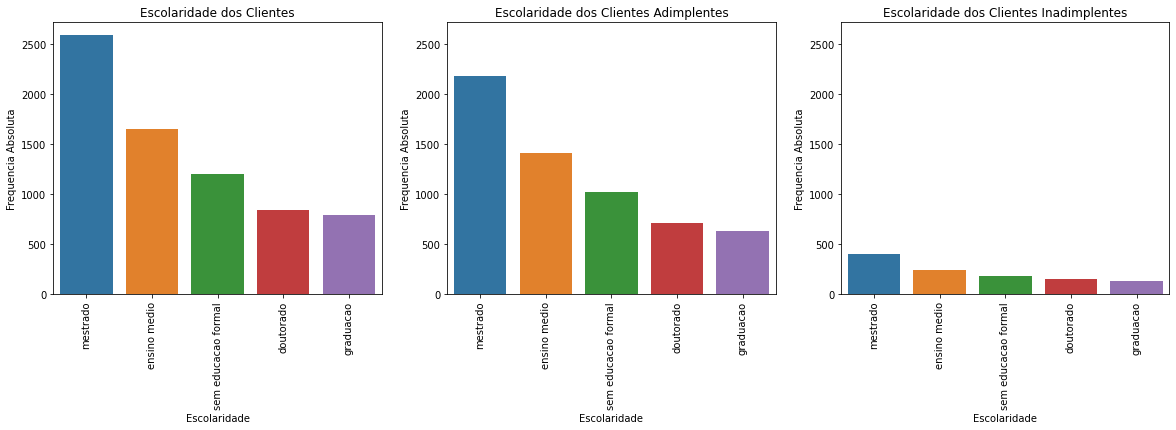

In [31]:
coluna = 'escolaridade' #Coluna para a análise
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes','Escolaridade dos Clientes Inadimplentes'] #títulos dos gráficos

eixo=0
max_y=0

max=df.select_dtypes('object').describe()[coluna]['freq']*1.1  #multiplica-se por 1.1 para alinhar a comparação dos eixos.

figura,eixos=plt.subplots(1,3, figsize=(20,5),sharex=True) #subplot= plotar mais de um gráfico(1(uma linha, 3(tres colunas), figsize= tamanho, o eixo corresponde a uma lista dos gráficosa figura mostra de forma visual os dados.

for dataframe in [df, df_adimplente,df_inadimplente]:

  df_to_plot=dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna:'frequencia_absoluta'},inplace=True)
  df_to_plot[coluna]=df_to_plot.index
  df_to_plot.sort_values(by=[coluna])

  f=sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'],ax=eixos[eixo])#coloca os valores da coluna no eixo x e a frequenci absoluta calculada,, passando o eixo inicial
  f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequencia Absoluta') #utilizando o set para dar nome aos títulos do eixo x e y
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90) #rotacionando a legenda em 90°

  #Ajustando detalhes de escala
  
  _,max_y_f=f.get_ylim()
  max_y=max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0,max_y))
  eixo +=1

  figura.show()

Faixa de renda Anual

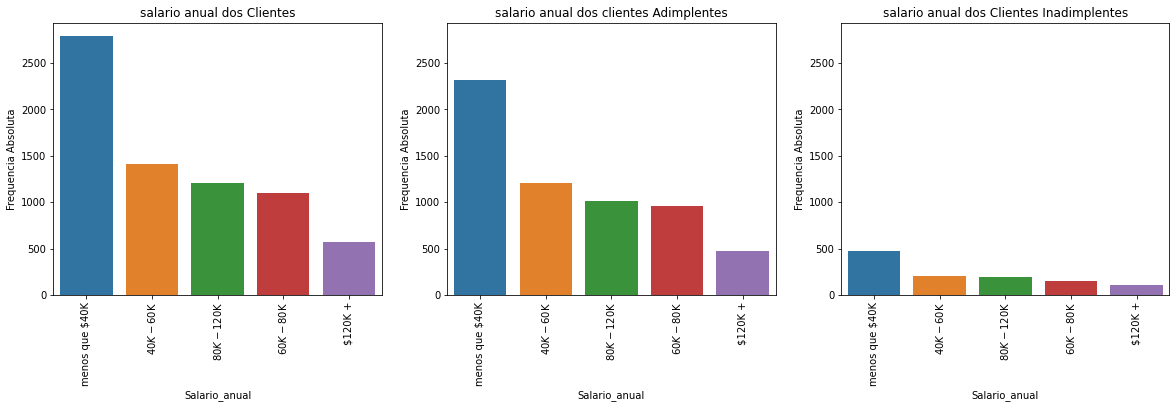

In [32]:
coluna = 'salario_anual' #Coluna para a análise
titulos = ['salario anual dos Clientes', 'salario anual dos clientes Adimplentes','salario anual dos Clientes Inadimplentes'] #títulos dos gráficos

eixo=0
max_y=0

figura,eixos=plt.subplots(1,3, figsize=(20,5),sharex=True) #subplot= plotar mais de um gráfico(1(uma linha, 3(tres colunas), figsize= tamanho, o eixo corresponde a uma lista dos gráficosa figura mostra de forma visual os dados.

for dataframe in [df, df_adimplente,df_inadimplente]:

  df_to_plot=dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna:'frequencia_absoluta'},inplace=True)
  df_to_plot[coluna]=df_to_plot.index
  df_to_plot.sort_values(by=[coluna])

  f=sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'],ax=eixos[eixo])#coloca os valores da coluna no eixo x e a frequenci absoluta calculada,, passando o eixo inicial
  f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequencia Absoluta') #utilizando o set para dar nome aos títulos do eixo x e y
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90) #rotacionando a legenda em 90°

  #Ajustando detalhes de escala
  
  _,max_y_f=f.get_ylim()
  max_y=max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0,max_y))
  eixo +=1

  figura.show()

Idade dos clientes inadimplentes

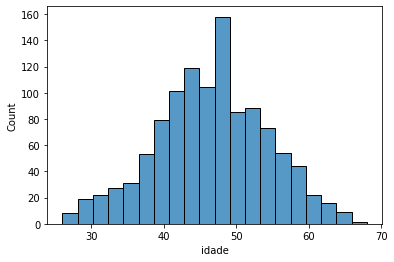

In [71]:
#qtd clienets inadimplentes
sns.histplot(data=df[df['default']==1],x='idade')

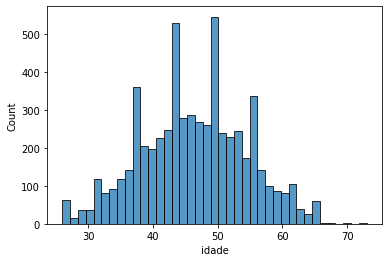

In [72]:

#Qtd clientes adimplentes
sns.histplot(data=df[df['default']==0],x='idade')

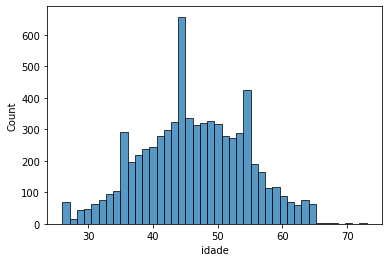

In [74]:
#qtd clientes total por idade
sns.histplot(data=df,x='idade')

Estado civíl

**Visualização de dados numéricos**


In [35]:
df.drop(['id','default'],axis=1).select_dtypes('number').head(n=5) #excluindo a coluna id e default e visualizando as colunas numéricas.

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,42
1,49,5,44,6,2,1,33
2,51,3,36,4,0,1,20
4,40,3,21,5,0,1,28
5,44,2,36,3,2,1,24


Transações nos últimos 12 meses

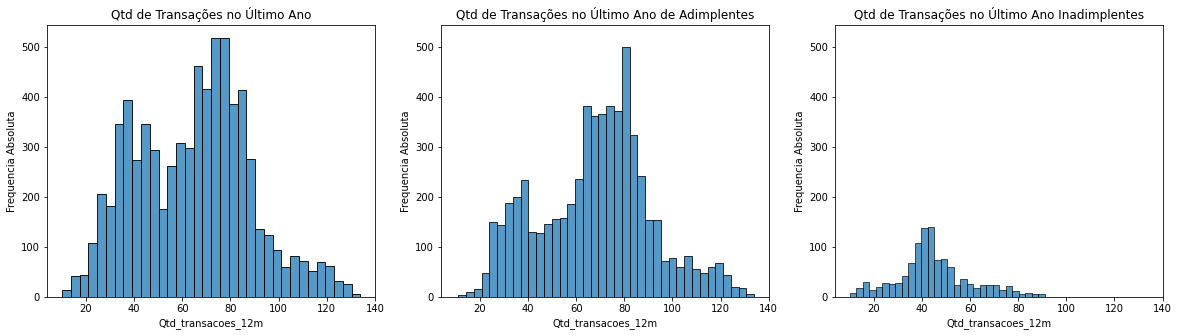

In [36]:
coluna='qtd_transacoes_12m'
titulos=['Qtd de Transações no Último Ano','Qtd de Transações no Último Ano de Adimplentes', 'Qtd de Transações no Último Ano Inadimplentes']

eixo=0
max_y=0

figura,eixos=plt.subplots(1,3, figsize=(20,5),sharex=True) #subplot= plotar mais de um gráfico(1(uma linha, 3(tres colunas), figsize= tamanho, o eixo corresponde a uma lista dos gráficosa figura mostra de forma visual os dados.

for dataframe in [df, df_adimplente,df_inadimplente]:

  f=sns.histplot(x=coluna,data=dataframe,stat='count',ax=eixos[eixo]) #utiliza o método hitplot para plotar o gráfico
  f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequencia Absoluta') #utilizando o set para dar nome aos títulos do eixo x e y

  _,max_y_f=f.get_ylim()
  max_y=max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0,max_y))
  eixo +=1  

figura.show()

 **insiths**

De acordo com as análises realziadas, podemos afirmar que:
1 - Os clientes com alto nível de instrução tem maior tendência de inadimplência como odemostrado no gráfico de escolaridade.
2 - Quanto menor o nível de renda, maiores são os níveis de inadimplência.
3 - A inadimplência está concentrada nos clientes com idade entre 40 e 50 anos.
4 - Os clientes que transacionam entre 40 a 45 vezes ao ano, possui maior inadimplência, o que é de grande valia para a empresa que possui alta adimplencia com seus maiores clientes.
5 -